In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re,nltk

In [ ]:
fomr google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_excel('/content/drive/MyDrive/Movie Sentiment/New/Data/NM_comment_clean.xlsx')
data.head()

,Unnamed: 0,Unnamed: 0.1,Movie Name,Label,Main Comment,Comment,Cleaned
0,0,0,Nishpap Munna,pos,",""😎😎😎😎😎😎😎😋😋😋😋😋😋😋 nice movie""",", ""😎😎😎😎😎😎😎😋😋😋😋😋😋😋 সুন্দর সিনেমা""",সুন্দর সিনেমা
1,1,1,Nishpap Munna,ntr,"( নিশী মনি )""","( নিশী মনি )""",নিশী মনি
2,2,2,Nishpap Munna,pos,"💜,""I loved movie""","💜, ""আমি সিনেমা পছন্দ করি""",আমি সিনেমা পছন্দ করি
3,3,3,Nishpap Munna,neg,"2022,"",""খুব ফালতু""","2022,"",""খুব ফালতু""",খুব ফালতু
4,4,4,Nishpap Munna,neg,"24,"" ছামার সিনেমা""","24, ""ছামার সিনেমা""",ছামার সিনেমা


In [ ]:
data.drop(columns={'Unnamed: 0','Unnamed: 0.1'},axis=1,inplace=True)

In [ ]:
# Length of each Text
data['length'] = data['Cleaned'].apply(lambda x:len(x.split()))
# Remove the Text with least words
dataset = data.loc[data.length>0]
dataset = dataset.reset_index(drop = True)
print("After Cleaning:","\nRemoved {} Small Text".format(len(data)-len(dataset)),
      "\nTotal Text:",len(dataset))

After Cleaning: 
Removed 0 Small Text 
Total Text: 4006


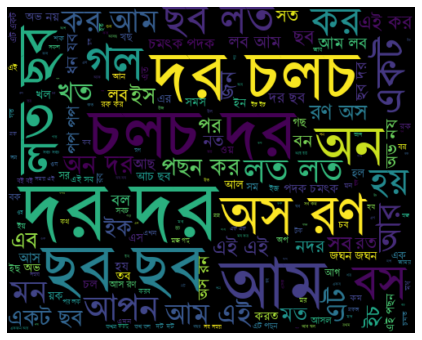

In [ ]:
from wordcloud import WordCloud 
# Plot the Word Cloud
allWords = ' '.join([comnt for comnt in data['Cleaned']])
wordCloud = WordCloud(font_path='/content/drive/MyDrive/Movie Sentiment/New/Nikosh/Nikosh.ttf', width =500, height =400, random_state = 21, max_font_size = 119).generate(allWords)

fig = plt.figure(1, figsize=(10, 6))
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [ ]:
def data_summary(dataset):
    
    """
    This function will print the summary of the Text and words distribution in the dataset. 
    
    Args:
        dataset: list of cleaned sentences   
        
    Returns:
        Number of documnets per class: int 
        Number of words per class: int
        Number of unique words per class: int
    """
    documents = []
    words = []
    u_words = []
    total_u_words = [word.strip().lower() for t in list(dataset.Cleaned) for word in t.strip().split()]
    class_label= [k for k,v in dataset.Label.value_counts().to_dict().items()]
  # find word list
    for label in class_label: 
        word_list = [word.strip().lower() for t in list(dataset[dataset.Label==label].Cleaned) for word in t.strip().split()]
        counts = dict()
        for word in word_list:
                counts[word] = counts.get(word, 0)+1
        # sort the dictionary of word list  
        ordered = sorted(counts.items(), key= lambda item: item[1],reverse = True)
        # Documents per class
        documents.append(len(list(dataset[dataset.Label==label].Cleaned)))
        # Total Word per class
        words.append(len(word_list))
        # Unique words per class 
        u_words.append(len(np.unique(word_list)))
       
        print("\nClass Name : ",label)
        print("Number of Documents:{}".format(len(list(dataset[dataset.Label==label].Cleaned))))  
        print("Number of Words:{}".format(len(word_list))) 
        print("Number of Unique Words:{}".format(len(np.unique(word_list)))) 
        print("Most Frequent Words:\n")
        for k,v in ordered[:10]:
              print("{}\t{}".format(k,v))
    print("Total Number of Unique Words:{}".format(len(np.unique(total_u_words))))           
   
    return documents,words,u_words,class_label

#call the fucntion
documents,words,u_words,class_names = data_summary(dataset)   


Class Name :  pos
Number of Documents:2196
Number of Words:5888
Number of Unique Words:794
Most Frequent Words:

সুন্দর	623
ভাল	503
খুব	254
সিনেমা	219
মুভি	179
চলচ্চিত্র	168
ভালো	155
ছবি	134
খান	130
শাকিব	121

Class Name :  neg
Number of Documents:1293
Number of Words:3259
Number of Unique Words:359
Most Frequent Words:

সিনেমা	448
ছবি	343
খারাপ	317
বাজে	289
খুব	259
ফালতু	239
বাল	138
ঘৃণা	59
মার্কা	54
মুভি	46

Class Name :  ntr
Number of Documents:517
Number of Words:3879
Number of Unique Words:1666
Most Frequent Words:

এই	82
না	57
যে	48
আমি	45
কে	44
আমার	43
ছবি	43
সাকিব	36
শাকিব	32
ও	30
Total Number of Unique Words:2277


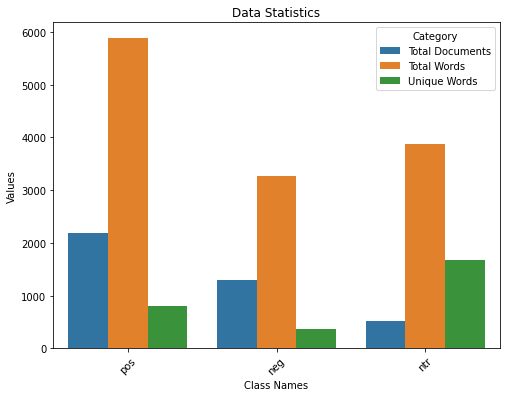

In [ ]:
data_matrix = pd.DataFrame({'Total Documents':documents,
                            'Total Words':words,
                            'Unique Words':u_words,
                            'Class Names':class_names})
df = pd.melt(data_matrix, id_vars="Class Names", var_name="Category", value_name="Values")
plt.figure(figsize=(8, 6))
ax = plt.subplot()

sns.barplot(data=df,x='Class Names', y='Values' ,hue='Category')
ax.set_xlabel('Class Names') 
ax.set_title('Data Statistics')

ax.xaxis.set_ticklabels(class_names, rotation=45);

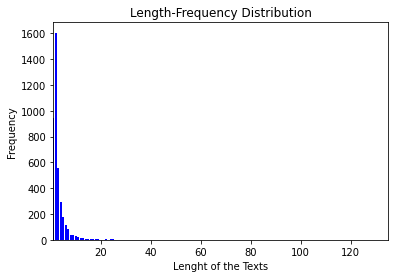

Maximum Length of a Text: 159
Minimum Length of a Text: 1
Average Length of a Text: 3.0


In [ ]:
# Calculate the Text of each of the Text
dataset['TextLength'] = dataset.Cleaned.apply(lambda x:len(x.split()))
frequency = dict()
for i in dataset.TextLength:
    frequency[i] = frequency.get(i, 0)+1

plt.bar(frequency.keys(), frequency.values(), color ="b")
plt.xlim(1, 135)
# in this notbook color is not working but it should work.
plt.xlabel('Lenght of the Texts')
plt.ylabel('Frequency')
plt.title('Length-Frequency Distribution')
plt.show()  
print(f"Maximum Length of a Text: {max(dataset.TextLength)}")
print(f"Minimum Length of a Text: {min(dataset.TextLength)}")
print(f"Average Length of a Text: {round(np.mean(dataset.TextLength),0)}")

In [ ]:
dataset.groupby('Label').size().reset_index(name='counts')

,Label,counts
0,neg,1293
1,ntr,517
2,pos,2196


In [ ]:
                                      #==================================================
                                       ################# Label Encoding Function #########
                                       #==================================================
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

def label_encoding(sentiment,bool):
    """
    This function will return the encoded labels in array format. 
    
    Args:
        sentiment: series of class names(str)
        bool: boolean (True or False)
        
    Returns:
        labels: numpy array 
    """
    le = LabelEncoder()
    le.fit(sentiment)
    encoded_labels = le.transform(sentiment)
    labels = np.array(encoded_labels) # Converting into numpy array
    class_names =le.classes_ ## Define the class names again
    if bool == True:
        print("\n\t\t\t===== Label Encoding =====","\nClass Names:-->",le.classes_)
        for i in sample_data:
            print(sentiment[i],' ', encoded_labels[i],'\n')

    return labels

In [ ]:

                           #===========================================================
                           ################# Dataset Splitting Function ###############
                           #=========================================================== 

def dataset_split(feature_space,sentiment):
    """
    This function will return the splitted (80%-20%) feature vector . 
    
    Args:
        feature_space: calcuated feature vector (sparse matrix)
        sentiment: encoded lables (array) 
        
    Returns:
        X_train: training feature vector (sparse matrix)
        X_test : testing feature vector (sparse matrix)
        y_train: training encoded labels (array) 
        y_test : testing encoded labels (array) 
    """

    X_train,X_test,y_train,y_test = train_test_split(feature_space,sentiment,train_size = 0.8,
                                                  test_size = 0.20,random_state =22,stratify=sentiment)
    print("Feature Size :======>",X_train.shape[1])
    print("\nDataset Distribution:\n")
    print("\tSet Name","\t\tSize")
    print("\t========\t\t======")

    print("\tFull\t\t\t",feature_space.shape[0],
        "\n\tTraining\t\t",X_train.shape[0],
        "\n\tTest\t\t\t",X_test.shape[0])
  
    return X_train,X_test,y_train,y_test


In [ ]:
def calc_gram_tfidf(reviews,gram):
    """
    This function will return the tf-idf value of the respective gram features . 
    
    Args:
        reviews: a list of cleaned reviews   
        
    Returns:
        tfidf: a instance of TfidfVectorizer
        X : Unigram Feature Vector (sparse matrix)
    """
    tfidf = TfidfVectorizer(ngram_range=gram,use_idf=True,tokenizer=lambda x: x.split()) 
    X = tfidf.fit_transform(reviews)
    
    return tfidf,X

In [ ]:
                                            #======================================
                                            ##### Unigram Tf-idf value calculation
                                            #======================================
          

def calc_unigram_tfidf(reviews):
    tfidf = TfidfVectorizer(use_idf=True,tokenizer=lambda x: x.split()) 
    X = tfidf.fit_transform(reviews)
    
    return tfidf,X



In [ ]:

                                            #======================================
                                            ##### Bi-gram Tf-idf value calculation
                                            #======================================


def calc_bigram_tfidf(reviews):
    tfidf = TfidfVectorizer(ngram_range=(1,2),use_idf=True,tokenizer=lambda x: x.split()) 
    X = tfidf.fit_transform(reviews)
    
    return tfidf,X




In [ ]:

                                            #======================================
                                            ##### Tri-gram Tf-idf value calculation
                                            #======================================

def calc_trigram_tfidf(reviews):
    tfidf = TfidfVectorizer(ngram_range=(1,3),use_idf=True,tokenizer=lambda x: x.split()) 
    X = tfidf.fit_transform(reviews)
    
    return tfidf,X

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import average_precision_score,roc_auc_score, roc_curve, precision_recall_curve

In [ ]:
def model_defination():
    lr_model = LogisticRegression(random_state = 123, max_iter = 10000)
    dt_model = DecisionTreeClassifier(criterion = 'gini', random_state = 0, max_depth = 1, min_samples_split = 25)
    rf_model = RandomForestClassifier(criterion ='entropy', random_state = 13)
    mnb_model = MultinomialNB(alpha=0.431)
    knn_model = KNeighborsClassifier(n_neighbors=100, metric = 'minkowski', algorithm = 'ball_tree', n_jobs = 10)
    lsvm_model = SVC(kernel = 'linear',C = 0.2, probability=True, random_state = 0)
    ksvm_model = SVC(C= 1000,kernel = 'rbf',probability=True, gamma = 0.00015, random_state = 0)
    sgd_model = SGDClassifier(loss ='log',penalty='l2', max_iter=5)
    model_names = ['Logistic Regression','Decision Tree','Random Forest','Naive Bayes','KNN','Linear SVM','Kernel SVM','SGD']
    # Create list of models
    ml_models = [lr_model,dt_model,rf_model,mnb_model,knn_model,lsvm_model,ksvm_model,sgd_model]
    return ml_models,model_names

In [ ]:
def model_performace(model,X_train,X_test,y_train,y_test):
    """
    This function will return the performance parameter values of each ML models.
    Performance parameters are Accuracy, F1-Score, Precision, Recall.
    
    Args:
        model: a ML model instance
        X_train: training feature vector (sparse matrix)
        X_test : testing feature vector (sparse matrix)
        y_train: training encoded labels (array) 
        y_test : testing encoded labels (array) 
        
    Returns:
        my_dict: a dictionary of all the parameters for each models
    """
    my_dict = {}
    model.fit(X_train,y_train)
    # Prediction
    pred_y = model.predict(X_test)
    my_dict['Accuracy'] = round(accuracy_score(y_test, pred_y),4)*100 
    my_dict['Precision'] = round(precision_score(y_test, pred_y,average='micro'),4)*100 
    my_dict['Recall'] = round(recall_score(y_test, pred_y,average='micro'),4)*100 
    my_dict['F1 Score'] = round(f1_score(y_test, pred_y,average='micro'),4)*100 
    
    return my_dict  

In [ ]:
def performance_table(performance_dict):

    acc_list = []
    pr_list = []
    re_list = []
    f1_list = []
    for i in performance_dict.keys():
        acc_list.append(performance_dict[i]['Accuracy'])
        pr_list.append(performance_dict[i]['Precision'])
        re_list.append(performance_dict[i]['Recall'])
        f1_list.append(performance_dict[i]['F1 Score'])

    # Create a dataframe
    performance_df = pd.DataFrame({'Accuracy':acc_list,'Precision':pr_list,
                                   'Recall':re_list,'F1 Score':f1_list},
                                  index =['LR','DT','RF','MNB','KNN','Linear SVM','RBF SVM','SGD'])
    performance_df.style.highlight_max(color = 'lightgreen', axis = 0)
    return performance_df

In [ ]:
path = "/content/drive/MyDrive/Movie Sentiment/New/Nishpap Munna/json/"

In [ ]:
import json
## save the performance of the model for each gram feature 
gram_names = ['Unigram','Bigram','Trigram']
ngrams = [(1,1),(1,2),(1,3)]
for i,gram in enumerate(ngrams):
    tfidf,feature = calc_gram_tfidf(dataset.Comment,gram)
    labels = label_encoding(dataset.Label,False)
    X_train,X_test,y_train,y_test = dataset_split(feature,labels) 
    ml_models,model_names = model_defination()
    # call model accuracy function and save the metrices into a dictionary
    accuracy = {f'{model_names[j]}':model_performace(model,X_train,X_test,y_train,y_test) for j,model in enumerate(ml_models)}
    #Save the performance parameter into json file
    with open(path+f'ml_performance_{gram_names[i]}.json', 'w') as f:
          json.dump(accuracy, f)

Feature Size :======> 5578

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 4006 
	Training		 3204 
	Test			 802


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


Feature Size :======> 14082

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 4006 
	Training		 3204 
	Test			 802


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


Feature Size :======> 21421

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 4006 
	Training		 3204 
	Test			 802


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


In [ ]:
accuracy1 = json.load(open('/content/drive/MyDrive/Movie Sentiment/New/Nishpap Munna/json/ml_performance_Unigram.json'))
table = performance_table(accuracy1)
table

,Accuracy,Precision,Recall,F1 Score
LR,84.04,84.04,84.04,84.04
DT,59.73,59.73,59.73,59.73
RF,85.16,85.16,85.16,85.16
MNB,83.79,83.79,83.79,83.79
KNN,70.82,70.82,70.82,70.82
Linear SVM,77.06,77.06,77.06,77.06
RBF SVM,78.05,78.05,78.05,78.05
SGD,85.16,85.16,85.16,85.16


In [ ]:
print(f"Highest Accuracy achieved by {table.Accuracy.idxmax(axis = 0)} at = {max(table.Accuracy)}")
print(f"Highest F1-Score achieved by {table['F1 Score'].idxmax(axis = 0)} at = {max(table['F1 Score'] )}")
print(f"Highest Precision Score achieved by {table['Precision'].idxmax(axis = 0)} at = {max(table['Precision'] )}")
print(f"Highest Recall Score achieved by {table['Recall'].idxmax(axis = 0)} at = {max(table['Recall'] )}")

Highest Accuracy achieved by RF at = 85.16
Highest F1-Score achieved by RF at = 85.16
Highest Precision Score achieved by RF at = 85.16
Highest Recall Score achieved by RF at = 85.16


In [ ]:
from sklearn.linear_model import SGDClassifier
classifier1 = SGDClassifier(loss ='log',penalty='l2', max_iter=5)
classifier1.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


SGDClassifier(loss='log', max_iter=5)

In [ ]:
y_pred = classifier1.predict(X_test)
y_pred[:10]

array([2, 2, 0, 0, 2, 1, 0, 2, 2, 2])

In [ ]:
print(f"Train Accuracy is: {round(classifier1.score(X_train, y_train)*100,2)}%")
print(f"Test Accuracy is : {round(classifier1.score(X_test, y_test)*100,2)}%")

Train Accuracy is: 99.56%
Test Accuracy is : 82.54%


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.83      0.89       259
           1       0.81      0.21      0.34       103
           2       0.77      0.97      0.86       440

    accuracy                           0.83       802
   macro avg       0.85      0.67      0.69       802
weighted avg       0.84      0.83      0.80       802



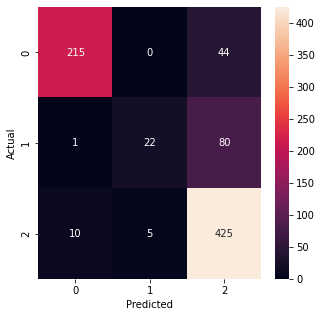

In [ ]:
conf_mat = confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
cv,feature_vector = calc_trigram_tfidf(data.Cleaned)
df = pd.DataFrame(feature_vector.toarray(), columns = cv.get_feature_names())
df

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,অংশ,অংশ আছে,অখিলআধান,অগ্রিম,অগ্রিম শুভেচ্ছা,অজান্তে,অজান্তে তার,অজান্তে তার অজান্তে,অজান্তে তার অজান্তেই,অজান্তেই,...,ৰহমানেৰ ৰাহিম এটা,ৰাহিম,ৰাহিম এটা,ৰাহিম এটা কি,৳,৷,৷ নীল,৷ নীল আকাশের,৷ফালতু,৷ফালতু মুভিটা
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
